In [1]:
import os, random
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd

# import eli5

from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge ,LinearRegression, LogisticRegression

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, cross_val_score, train_test_split, TimeSeriesSplit

from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

from sklearn.cluster import KMeans
from tqdm import tqdm_notebook

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

# Plot Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
var = pd.read_csv('VariableDescription.csv')

In [3]:
train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [4]:
test.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [5]:
import pandas as pd

def combine_columns(df, columns, strategy='add'):
    # create a new DataFrame to hold the combined columns
    combined_df = pd.DataFrame()

    # loop over all combinations of columns
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            # skip duplicate combinations and combinations with the same column
            if i >= j or col1 == col2:
                continue
            
            # combine the columns using the specified strategy
            if strategy == 'add':
                combined = df[col1] + df[col2]
            elif strategy == 'subtract':
                combined = df[col1] - df[col2]
            elif strategy == 'multiply':
                combined = df[col1] * df[col2]
            elif strategy == 'divide':
                combined = df[col1] / df[col2]
            else:
                raise ValueError(f'Invalid strategy: {strategy}')

            # add the combined column to the new DataFrame
            combined_df[f'{col1}_{col2}_{strategy}'] = combined

    # join the combined DataFrame with the original DataFrame
    return pd.concat([df, combined_df], axis=1)


In [6]:
def missing_columns(df, threshold):
    total = df.shape[0]
    missing = df.isna().sum()
    missing_percentage = (missing/total) * 100
    return list(missing_percentage[missing_percentage >= threshold].index)

In [7]:
top20_corrs = abs(train.corr()['target']).sort_values(ascending = False).head(20)
# top20_corrs
features_list = list((top20_corrs.index))

In [8]:
top20_corrs

target                     1.000000
child_observe_total        0.444812
child_age                  0.424989
child_height               0.299639
pri_fees_amount_2_3        0.293291
teacher_emotional_total    0.271212
id_dc_n                    0.233764
id_mn_n                    0.231750
pri_fees_amount            0.220514
pri_fees_amount_0_1        0.219503
pri_fees_amount_pv         0.218152
count_toilets_children     0.206862
id_team                    0.205517
pri_amount_funding_fees    0.201627
id_prov_n                  0.198516
ward_best                  0.197790
opening_hours              0.194841
ses_proxy                  0.173662
count_staff_qual_nqf6_9    0.173457
child_zha                  0.163230
Name: target, dtype: float64

In [9]:
missing_cols = missing_columns(train, 70)

In [10]:
numerical_cols = [col for col in train.columns if train[col].dtype == 'float']
print(numerical_cols)

['data_year', 'child_age', 'child_months_enrolment', 'child_height', 'child_observe_total', 'child_zha', 'child_attendance', 'ward_best', 'id_enumerator', 'id_facility', 'pqa_class_assistants', 'pqa_score_environment', 'pqa_score_assessment', 'pqa_score_relationships', 'pqa_score_curriculum', 'pqa_score_teaching', 'pra_experience', 'pra_class_present', 'pra_class_size', 'pra_class_attendance', 'pra_class_attendance_precovid', 'pra_hhsize', 'pra_measure_rectangle_length', 'pra_measure_rectangle_width', 'pra_class_space', 'pri_days', 'pri_time_open_hours', 'pri_time_open_minutes', 'pri_time_close_hours', 'pri_time_close_minutes', 'pri_year', 'pri_fees_amount', 'pri_dsd_year', 'pri_capacity', 'pri_amount_funding_dsd', 'pri_amount_funding_fees', 'pri_children_4_6_years', 'pri_difficult_see', 'pri_difficult_hear', 'pri_difficult_walk', 'pri_difficult_hold', 'pri_difficult_communicate', 'pri_difficult_learn', 'pri_covid_staff_retrench', 'pri_fees_amount_0_1', 'pri_fees_amount_2_3', 'pri_expe

In [11]:
# train.drop(columns=missing_cols, inplace=True)
# test.drop(columns=missing_cols, inplace=True)

In [12]:
train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [13]:
date_col = ['child_date','child_dob','child_enrolment_date']

for i in date_col:
    train[i] = pd.to_datetime(train[i], errors='coerce')
    test[i] = pd.to_datetime(test[i], errors='coerce')

In [14]:
date_col = ['child_date','child_dob']
def date_creation(df, columns):
    for col in date_col:
        df[col + '_day'] = df[col].dt.day
        df[col + '_month'] = df[col].dt.month
        df[col + '_year'] = df[col].dt.year
        # df = df.drop(columns=col)
    return df

In [15]:
train = date_creation(train, date_col)
test = date_creation(test, date_col)

In [16]:
top20_corrs = abs(train.corr()['target']).sort_values(ascending = False).head(50)
# top20_corrs
features_list = list((top20_corrs.index))

In [17]:
print(features_list)

['target', 'child_observe_total', 'child_age', 'child_height', 'pri_fees_amount_2_3', 'teacher_emotional_total', 'id_dc_n', 'id_mn_n', 'pri_fees_amount', 'pri_fees_amount_0_1', 'pri_fees_amount_pv', 'count_toilets_children', 'child_date_year', 'id_team', 'pri_amount_funding_fees', 'id_prov_n', 'ward_best', 'opening_hours', 'ses_proxy', 'count_staff_qual_nqf6_9', 'child_zha', 'count_staff_contract_permanent', 'count_staff_paid', 'child_dob_year', 'count_staff_gender_female', 'pri_expense_staff', 'count_staff_paid_assistants', 'count_staff_all', 'count_staff_time', 'count_staff_gender', 'count_staff_salary', 'count_staff_contract', 'pri_expense_admin', 'count_staff_salary_paid', 'sanitation_educators', 'count_staff_time_full', 'id_facility_n', 'id_enumerator', 'count_staff_paid_practitioners', 'count_register_race_white', 'quintile', 'count_present_girls', 'longitude', 'pri_fees_amount_4_6', 'count_children_present', 'count_staff_paid_support', 'count_present_boys', 'count_register_year_

In [18]:
len_train = len(train)
df = pd.concat([train, test]).reset_index(drop=True)

In [19]:
df.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [20]:
def location_feature(df):
    # Reference: https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved
    scale = 14
    df.loc[:,'latitude']=round(df.latitude,scale)
    df.loc[:,'longitude']=round(df.longitude,scale)
    
    df['loc_group'] = df.groupby(['latitude', 'longitude']).ngroup()
    print(f'{df.loc_group.nunique()} unique locations')
    
    return df

df = location_feature(df)

1670 unique locations


In [21]:
df['child_age_group'] = df['child_age_group'].replace({'70 Months or older':'60-69 months', 'Younger than 50 months':'50-59 months'})

In [22]:
df['child_observe_general'] = df['child_observe_attentive']+'_'+df['child_observe_concentrated']+'_'+df['child_observe_diligent']+'_'+df['child_observe_interested']

In [23]:
df['location_id_enumerator_count'] = df.groupby(['prov_best','id_enumerator'])['id_enumerator'].transform('count')

In [24]:
df['child_age_years'] = df['child_age'] / 12
df['child_age_years'] = df['child_age_years'].round()

In [25]:
def combine_categorical_columns(df, categorical_columns):
    # create a new DataFrame to hold the combined columns
    combined_df = pd.DataFrame()

    # loop over all combinations of columns
    for i, col1 in enumerate(categorical_columns):
        for j, col2 in enumerate(categorical_columns):
            # skip duplicate combinations and combinations with the same column
            if i >= j or col1 == col2:
                continue
            
            # combine the categorical columns with underscores
            combined = df[col1].astype(str).fillna('missing') + '_' + df[col2].astype(str).fillna('missing')

            # add the combined column to the new DataFrame
            combined_df[f'{col1}_{col2}'] = combined

    # join the combined DataFrame with the original DataFrame
    return pd.concat([df, combined_df], axis=1)

In [26]:
# catego = ['id_mn_best', 'id_dc_best', 'id_enumerator', 'ses_proxy', 'id_facility_n','child_observe_total','child_age_group','child_observe_attentive','child_observe_interested','pri_holidays','child_observe_concentrated','child_observe_diligent',
# 'pra_groupings_2','obs_materials_19','pri_transport','pri_language_3','pri_funding_97','obs_materials_12'
#          ]
# df = combine_categorical_columns(df, catego)

In [27]:
df.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [28]:
df['child_year_dff'] = df['child_date_year'] - df['child_dob_year']

In [29]:
# Create new feature for age at enrollment
df['child_enrollment_age'] = np.floor((df['child_enrolment_date'] - df['child_dob']) / np.timedelta64(1, 'M'))

# Create new feature for duration of enrollment in months
df['enrollment_duration'] = np.floor((df['child_date'] - df['child_enrolment_date']) / np.timedelta64(1, 'M'))

In [30]:
cos = ['count_staff_salary_paid',
       'count_staff_salary', 'count_staff_gender_female', 'count_staff_gender',
       'count_staff_contract', 'count_staff_time_full', 'count_staff_time',
       'count_staff_qual_nqf6_9', 'count_toilets_children']

for i in cos:
    df[i+'_std'] = df.groupby(['id_enumerator','prov_best'])[i].transform('std')
    df[i+'_mean'] = df.groupby(['id_enumerator','prov_best'])[i].transform('mean')
    
    df[i+'c_std'] = df.groupby(['child_observe_general'])[i].transform('std')
    df[i+'c_mean'] = df.groupby(['child_observe_general'])[i].transform('mean')

In [31]:
cos = ['count_register_race_white',
       'count_register_race_white', 'count_register_race_indian']

for i in cos:
    df[i+'_std'] = df.groupby(['id_enumerator','prov_best'])[i].transform('std')
    df[i+'_mean'] = df.groupby(['id_enumerator','prov_best'])[i].transform('mean')
    
    df[i+'c_std'] = df.groupby(['child_observe_general'])[i].transform('std')
    df[i+'c_mean'] = df.groupby(['child_observe_general'])[i].transform('mean')

In [32]:
cos = ['latitude', 'longitude']
for i in cos:
    df[i+'_mean'] = df.groupby('id_enumerator')[i].transform('mean')
    df[i+'c_mean'] = df.groupby('child_observe_general')[i].transform('mean')

df = combine_columns(df, cos, 'divide')

In [33]:
cos = ['count_staff_all', 'count_children_present','count_children_attendance']
for i in cos:
    df[i+'_std'] = df.groupby(['id_enumerator','prov_best'])[i].transform('std')
    df[i+'_count'] = df.groupby(['id_enumerator','prov_best'])[i].transform('count')
    df[i+'_mean'] = df.groupby(['id_enumerator','prov_best'])[i].transform('mean')
    
    df[i+'c_std'] = df.groupby(['child_observe_general'])[i].transform('std')
    df[i+'c_mean'] = df.groupby(['child_observe_general'])[i].transform('mean')
    
df = combine_columns(df, cos, 'divide')
df = combine_columns(df, cos, 'add')

In [34]:
cos = ['teacher_emotional_total', 'pri_fees_amount_pv','pri_fees_amount']
for i in cos:
    df[i+'_std'] = df.groupby(['id_enumerator','prov_best'])[i].transform('std')
    df[i+'_count'] = df.groupby(['id_enumerator','prov_best'])[i].transform('count')
    df[i+'_mean'] = df.groupby(['id_enumerator','prov_best'])[i].transform('mean')
    
    df[i+'c_std'] = df.groupby(['child_observe_general'])[i].transform('std')
    df[i+'c_mean'] = df.groupby(['child_observe_general'])[i].transform('mean')

df = combine_columns(df, cos, 'multiply')
df = combine_columns(df, cos, 'subtract')

In [35]:
cos = ['child_age', 'child_height','child_observe_total']
for i in cos:
    df[i+'_mean'] = df.groupby(['id_enumerator','prov_best'])[i].transform('mean')
    df[i+'_count'] = df.groupby(['id_enumerator','prov_best'])[i].transform('count')
    df[i+'_std'] = df.groupby(['id_enumerator','prov_best'])[i].transform('std')
    
    df[i+'c_std'] = df.groupby(['child_observe_general'])[i].transform('std')
    df[i+'c_mean'] = df.groupby(['child_observe_general'])[i].transform('mean')

df = combine_columns(df, ['child_age', 'child_height'], 'multiply')
df = combine_columns(df, ['child_age', 'child_height'], 'divide')

In [36]:
numerical_cols = [col for col in df.columns if df[col].dtype == 'float']
print(numerical_cols)

['data_year', 'child_age', 'child_months_enrolment', 'child_height', 'child_observe_total', 'child_zha', 'child_attendance', 'ward_best', 'id_enumerator', 'id_facility', 'pqa_class_assistants', 'pqa_score_environment', 'pqa_score_assessment', 'pqa_score_relationships', 'pqa_score_curriculum', 'pqa_score_teaching', 'pra_experience', 'pra_class_present', 'pra_class_size', 'pra_class_attendance', 'pra_class_attendance_precovid', 'pra_hhsize', 'pra_measure_rectangle_length', 'pra_measure_rectangle_width', 'pra_class_space', 'pri_days', 'pri_time_open_hours', 'pri_time_open_minutes', 'pri_time_close_hours', 'pri_time_close_minutes', 'pri_year', 'pri_fees_amount', 'pri_dsd_year', 'pri_capacity', 'pri_amount_funding_dsd', 'pri_amount_funding_fees', 'pri_children_4_6_years', 'pri_difficult_see', 'pri_difficult_hear', 'pri_difficult_walk', 'pri_difficult_hold', 'pri_difficult_communicate', 'pri_difficult_learn', 'pri_covid_staff_retrench', 'pri_fees_amount_0_1', 'pri_fees_amount_2_3', 'pri_expe

In [37]:
cats = ['id_mn_best',
 'id_dc_best',
 'id_enumerator',
 'id_facility',
 'pri_precovid_attendance',
 'id_ward',
 'id_prov',
 'id_team',
 'id_facility_n',
 'id_ward_n',
 'id_mn_n',
 'id_dc_n','target',
 'id_prov_n','child_enrolment_date',
 'location_id_enumerator_count']

nums = [f for f in numerical_cols if f not in cats]

In [38]:
g = 'id_enumerator'

for f in nums:
    # print(f)
    try:
        agg = df.groupby(g)[f].agg(['mean'])
        agg.columns = [f + '_x0']

        df = df.merge(agg, on=[g], how='left')

        df[f + '_x1000'] = df[f] - df[f + '_x0']
        
    except:
        print('oh..no...')

In [39]:
g = 'prov_best'

for f in nums:
    # print(f)
    try:
        agg = df.groupby(g)[f].agg(['mean'])
        agg.columns = [f + '_x00']

        df = df.merge(agg, on=[g], how='left')

        df[f + '_x10'] = df[f] - df[f + '_x00']
        
    except:
        print('oh..no...')

In [40]:
# g = 'child_observe_general'

# for f in nums:
#     # print(f)
#     try:
#         agg = df.groupby(g)[f].agg(['mean'])
#         agg.columns = [f + '_x010']

#         df = df.merge(agg, on=[g], how='left')

#         df[f + '_x101'] = df[f] - df[f + '_x010']
        
#     except:
#         print('oh..no...')

In [41]:
col_drop = ['id_ward_n','language_match','id_dc_n','child_dob_day','child_date_month','count_staff_qual_nqf4_5','count_staff_qual_skills','count_toilets_adults',
            'count_staff_gender_male','count_staff_gender_other','count_staff_salary_unpaid','count_register_race_coloured','count_register_race',
             'count_register_race_african','count_register_race_other','count_register_year_2021', 'count_register_year_2020', 'count_register_year_2019', 'count_register_year_2018',
'count_register_year_2017', 'count_register_year_2016', 'count_register_year_2015', 'count_register_year_2014',
'count_register_year_2013', 'count_register_year_school', 'count_register_year_grader',
           'count_register_gender_female', 'count_register_gender_male', 'count_register_gender_other',
'count_register_gender','count_register_all','count_children_precovid','teacher_social_total','teacher_selfcare_total','obs_classrooms',
'pri_days','pri_time_open_minutes','pri_year','pri_time_close_minutes','pri_time_open_hours','pri_time_close_hours','id_facility']

df = df.drop(columns=col_drop)

In [42]:
df.drop(columns=missing_cols, inplace=True)

In [43]:
df.shape

(12265, 1429)

In [44]:
cos = ['child_age_group','child_observe_attentive','child_observe_interested','pri_holidays','child_observe_concentrated','child_observe_diligent',
'pra_groupings_2','obs_materials_19','pri_transport','pri_language_3','pri_funding_97','obs_materials_12']

for i in cos:
    df[i+'_nunique'] = df.groupby(['id_enumerator','prov_best'])[i].transform('nunique')
    df[i+'_count'] = df.groupby(['id_enumerator','prov_best'])[i].transform('count')

In [45]:
cat_cols_with_5_or_more_cats = ['ses_proxy', 'id_facility_n','child_observe_total','child_age','id_enumerator','obs_toilet_97','child_age_group','child_observe_attentive','child_observe_interested','pri_holidays','child_observe_concentrated','child_observe_diligent',
'pra_groupings_2','obs_materials_19','pri_transport','pri_language_3','pri_funding_97','obs_materials_12','loc_group','prov_best']
for var in cat_cols_with_5_or_more_cats:
    freq_var = var + '_freq'
    df[freq_var] = df[var].map(df[var].value_counts())

In [46]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocess_df(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('missing', inplace=True)
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            le_classes = le.classes_
            df[col] = df[col].apply(lambda x: np.NaN if le_classes[x] == 'missing' else x)
    return df

In [48]:
df = preprocess_df(df)

In [49]:
df.shape

(12265, 1473)

In [50]:
coordinates = df[['latitude', 'longitude']].values

In [51]:
emb_size = 20
precision = 1e6 

latlon = np.expand_dims(coordinates, axis=-1) 

m = np.exp(np.log(precision) / emb_size) 
angle_freq = m ** np.arange(emb_size) 
angle_freq = angle_freq.reshape(1, 1, emb_size) 

latlon = latlon * angle_freq 
latlon[..., 0::2] = np.cos(latlon[..., 0::2]) 
latlon[..., 1::2] = np.sin(latlon[..., 1::2]) 
latlon = latlon.reshape(-1, 2 * emb_size) 

df['exp_latlon1'] = [lat[0] for lat in latlon]
df['exp_latlon2'] = [lat[1] for lat in latlon]

In [52]:
def crt_crds(df): 
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['longitude']) + \
                      (np.sin(np.radians(15)) * df['latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['latitude']) + \
                      (np.sin(np.radians(15)) * df['longitude'])
    
    df['rot_30_x'] = (np.cos(np.radians(30)) * df['longitude']) + \
                      (np.sin(np.radians(30)) * df['latitude'])
    
    df['rot_30_y'] = (np.cos(np.radians(30)) * df['latitude']) + \
                      (np.sin(np.radians(30)) * df['longitude'])
    
    df['rot_45_x'] = (np.cos(np.radians(45)) * df['longitude']) + \
                      (np.sin(np.radians(45)) * df['latitude'])
    return df

In [53]:
df = crt_crds(df)

In [54]:
df.head()

child_id  data_year child_date  child_age child_enrolment_date  \
0      9844     2022.0 2022-02-03  59.000000                  NaT   
1      6489     2019.0        NaT  60.163933                  NaT   
2      9139     2022.0 2022-03-11  69.000000                  NaT   
3      4050     2021.0 2021-10-13  53.000000           2020-01-15   
4      6444     2021.0 2021-10-13  57.000000           2021-10-13   

   child_months_enrolment  child_grant  child_years_in_programme  \
0                     NaN          NaN                       NaN   
1                     NaN          NaN                       0.0   
2                     NaN          NaN                       NaN   
3                    20.0          1.0                       0.0   
4                     0.0          NaN                       1.0   

   child_height  child_observe_attentive  child_observe_concentrated  \
0           NaN                        3                           3   
1    103.000000                        3                           1   
2    108.400002                        2                           2   
3     98.099998                        0                           0   
4    114.000000                        0                           0   

   child_observe_diligent  child_observe_interested  child_observe_total  \
0                       3                         3                  4.0   
1                       3                         2                  4.0   
2                       3                         2                  7.0   
3                       3                         2                  9.0   
4                       0                         0                 12.0   

   child_gender  child_dob  child_zha  child_stunted  child_age_group  \
0             0 2017-02-06        NaN            NaN                0   
1             0        NaT  -1.356791            1.0                1   
2             1 2016-05-24  -1.250863            1.0                1   
3             1 2017-05-08  -1.830364            1.0                0   
4             0 2016-12-19   1.329264            1.0                0   

   id_mn_best  prov_best  id_dc_best  dc_best  mn_best  ward_best  \
0        39.0          2        35.0     35.0     28.0       39.0   
1         NaN          3        14.0     39.0      NaN        NaN   
2         1.0          9         1.0      8.0     11.0       85.0   
3       144.0          9        11.0      5.0      6.0       18.0   
4        68.0          3        21.0     21.0     98.0       10.0   

   id_enumerator  pra_free_play  pra_free_play_outdoor  pra_groupings  \
0        20005.0            NaN                    NaN            NaN   
1            NaN            NaN                    NaN            NaN   
2        20001.0            NaN                    NaN            NaN   
3         2689.0            3.0                    2.0           29.0   
4          542.0            0.0                    0.0            4.0   

   pra_groupings_1  pra_groupings_2  pra_groupings_3  pra_groupings_4  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              0.0              0.0              0.0              1.0   
4              1.0              1.0              1.0              1.0   

   pra_groupings_5  pra_engaged  pra_agency_choice  pra_agency_explore  \
0              NaN          NaN                NaN                 NaN   
1              NaN          NaN                NaN                 NaN   
2              NaN          NaN                NaN                 NaN   
3              1.0          2.0                3.0                 0.0   
4              1.0          2.0                0.0                 0.0   

   pra_agency_questions  pra_agency_understand  pra_agency_play  \
0                   NaN                    Na

In [55]:
df['target_encode'] = df.groupby(['id_enumerator'])['target'].transform('mean')

In [56]:
df['target_encode1'] = df.groupby(['prov_best'])['target'].transform('mean')

In [57]:
df['target_encode2'] = df.groupby(['child_age_years'])['target'].transform('mean')

In [58]:
# df['target_encode3'] = df.groupby(['child_observe_general'])['target'].transform('mean')

In [59]:
df['child_observe_general'].nunique()

176

In [60]:
train_df = df[:len_train]
test_df = df[len_train:]

In [180]:
X = train_df.drop(columns=['child_id','target','id_ward','child_date','child_dob','child_enrolment_date'])
y = train_df['target']
tes = test_df.drop(columns=['child_id','target','id_ward','child_date','child_dob','child_enrolment_date'])

In [181]:
def identify_correlated(df, threshold):
    corr_matrix = df.corr().abs()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    reduced_corr_matrix = corr_matrix.mask(mask)
    features_to_drop = [c for c in reduced_corr_matrix.columns if any(reduced_corr_matrix[c] > threshold)]
    return features_to_drop

In [182]:
%%time
features_to_drop1 = identify_correlated(X, .85)

CPU times: user 26.3 s, sys: 191 ms, total: 26.4 s
Wall time: 26.5 s


In [183]:
X.shape

(8585, 1477)

In [184]:
remove_feature = ['latitude', 'longitude','target_encode','target_encode2','target_encode3',
       'target_encode1', 'mult_targ', 'div_targ', 'add_targ', 'sub_targ']
features_to_drop1 = [ele for ele in features_to_drop1 if ele not in remove_feature]

In [185]:
len(features_to_drop1)

871

In [186]:
X = pd.DataFrame(X.drop(features_to_drop1, axis=1))
tes = pd.DataFrame(tes.drop(features_to_drop1, axis=1))

In [187]:
lgb_params = {'max_depth': 4,
              'n_estimators': 2735,
              'learning_rate': 0.03385547662158841,
              'subsample': 0.8828021321644064,
              'colsample_bytree': 0.9146259758865805,
              'reg_alpha': 3.695318443854609,
              'min_child_samples': 45,
              'num_leaves': 83,
              'subsample_freq': 2}

cat_params = {'max_depth': 6,
              'n_estimators': 3000,
              'learning_rate': 0.05469630738147686,
              'subsample': 0.9589557362085255,
              'colsample_bylevel': 0.6900054882758004,
              'l2_leaf_reg': 1.4446287147977914}

In [188]:
X.shape, tes.shape

((8585, 606), (3680, 606))

In [189]:
import re
for old_name in list(X.keys()):
    new_name = re.sub('[^0-9a-zA-Z]+', '_', old_name)
    if new_name != old_name:
        X[new_name] = X.pop(old_name)

In [190]:
import re
for old_name in list(tes.keys()):
    new_name = re.sub('[^0-9a-zA-Z]+', '_', old_name)
    if new_name != old_name:
        tes[new_name] = tes.pop(old_name)

In [191]:
X.fillna(-999, inplace=True)
tes.fillna(-999, inplace=True)

In [192]:
X.head()

,child_grant,child_years_in_programme,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_gender,child_stunted,id_mn_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,pra_free_play,pra_free_play_outdoor,pra_groupings_1,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pri_mobile,pri_school,pri_calc_time_open,pri_calc_time_close,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_toys,pri_aftercare,pri_fees,pri_fees_free,pri_facilities,pri_land,pri_bank,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_programme,pri_registered_npo,pri_network,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_7,pri_funding_donations,pri_attendance,pri_meals,teacher_social_peers,teacher_social_nonaggressive,teacher_social_cooperate,teacher_social_assistance,teacher_social_ideas,teacher_social_initiative,teacher_emotional_understand,teacher_emotional_appropriate,teacher_emotional_independent,teacher_emotional_adjust,teacher_emotional_confidence,teacher_emotional_selfstarter,teacher_social_met,teacher_emotional_met,hle_ind,obs_firstaid,obs_space,obs_area,obs_area_1,obs_area_2,obs_area_3,obs_area_4,obs_area_5,obs_area_6,obs_area_7,obs_area_8,obs_area_0,obs_materials,obs_materials_1,obs_materials_2,obs_materials_3,obs_materials_4,obs_materials_5,obs_materials_6,obs_materials_7,obs_materials_8,obs_materials_9,obs_materials_10,obs_materials_11,obs_materials_13,obs_materials_14,obs_materials_15,obs_materials_16,obs_materials_17,obs_materials_18,obs_materials_20,obs_materials_97,obs_materials_0,obs_accessible,obs_books,obs_books_age,obs_heating_census,obs_water,obs_potable,obs_handwashing_1,obs_handwashing_2,obs_handwashing_3,obs_handwashing_0,obs_handwashing_97,obs_toilet_1,obs_toilet_2,obs_toilet_3,obs_toilet_4,obs_toilet_5,obs_toilet_6,obs_toilet_7,obs_toilet_8,obs_toilet_0,obs_toilets_children,obs_toilets_gender,obs_building,obs_shared,obs_outdoor,obs_equipment,obs_equipment_0,obs_equipment_1,obs_equipment_2,obs_equipment_3,obs_equipment_4,obs_equipment_5,obs_condition_equipment,obs_fence,obs_gate,obs_access,obs_water_running,id_prov,latitude,longitude,grade_r,professionals_practitioners,certificate_registration_partial,certificate_registration_program,certificate_registration_npo,certificate_register,census,urban,id_team,phase_natemis,language_assessment,facility_type,sef_ind,pre_covid,quintile_used,id_facility_n,id_mn_n,ses_cat,child_observe_general,child_observe_totalc_std,child_age_x1000,child_zha_x0,child_attendance_x0,child_attendance_x1000,ward_best_x0,ward_best_x1000,pqa_class_assistants_x0,pqa_score_environment_x0,pqa_score_assessment_x0,pqa_score_relationships_x0,pqa_score_curriculum_x0,pqa_score_teaching_x0,pra_experience_x0,pra_class_present_x0,pra_class_attendance_x0,pra_class_attendance_precovid_x0,pra_hhsize_x0,pra_class_space_x0,pri_days_x0,pri_time_open_minutes_x0,pri_time_close_minutes_x0,pri_dsd_year_x0,pri_capacity_x0,pri_amount_funding_dsd_x0,pri_difficult_see_x0,pri_difficult_hear_x0,pri_difficult_walk_x0,pri_difficult_hold_x0,pri_difficult_communicate_x0,pri_difficult_learn_x0,pri_covid_staff_retrench_x0,pri_expense_food_x0,pri_expense_rent_x0,pri_expense_materials_x0,pri_expense_maintenance_x0,pri_expense_admin_x0,pri_expense_other_x0,pri_clinic_time_x0,pri_funding_subsidy_x0,teacher_duration_x0,teacher_duration_x1000,teacher_social_total_x0,teacher_social_total_x1000,teacher_selfcare_total_x0,latitude_x1000,count_register_gender_other_x0,count_register_year_2021_x0,count_register_year_2020_x0,count_register_year_2019_x0,count_register_year_2018_x0,count_register_year_2017_x0,count_register_year_2015_x0,count_register_

In [193]:
cat_params1 = {'max_depth': 6,
               'n_estimators': 2815,
               'learning_rate': 0.016772559095196555,
               'subsample': 0.6006374453944946,
               'colsample_bylevel': 0.7859416674173647,
               'l2_leaf_reg': 0.787849781157639}

In [194]:
cat_params = {'max_depth': 6,
              'n_estimators': 3000,
              'learning_rate': 0.05469630738147686,
              'subsample': 0.9589557362085255,
              'colsample_bylevel': 0.6900054882758004,
              'l2_leaf_reg': 1.4446287147977914}

In [219]:
lgb_params = {'max_depth': -1,
              'n_estimators': 2036,
              'learning_rate': 0.026272053458814608,
              'subsample': 0.8618704003978329,
              'colsample_bytree': 0.5650015600770752,
              'reg_alpha': 3.542200500934827,
              'min_child_samples': 20,
              'num_leaves': 46,
              'subsample_freq': 8}

In [220]:
%%time
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

# Initialize the model as XGBRegressor with 500 trees
model = LGBMRegressor(**lgb_params)

# Define the number of folds for the KFold cross-validation
n_folds = 10

# Create an instance of KFold with 5 splits, shuffled, and with random_state set to 1235
kf = KFold(n_splits=n_folds, shuffle=True, random_state=246810)

# Create arrays to store the out-of-fold and prediction values
oofs = np.zeros((len(X)))
preds = np.zeros((len(tes)))

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train, eval_set = [(X_test, y_test)],verbose=0, early_stopping_rounds=100)
    
    # Predict on the validation set
    vp = model.predict(X_test)
    
    # Calculate the validation score as the root mean squared error between the true values and predictions
    val_score = mean_squared_error((y_test), vp, squared=False)
    print(f'\nFold {fold+1} Val score: {val_score}\n')
    
    # Predict on the test set
    tp = model.predict(tes)
    
    # Store the validation predictions in the oofs array
    oofs[test_index] = vp
    # Average the predictions over the 5 folds and store in the preds array
    preds += tp/n_folds
    
# Calculate the out-of-fold score as the root mean squared error between the true values and predictions
oof_score = mean_squared_error((y), oofs, squared=False)
print(f'\nOOF RMSE score is : {oof_score}')
#9.76467315783768


Fold 1 Val score: 9.45105679390634


Fold 2 Val score: 8.885508107785492


Fold 3 Val score: 9.329987707388934


Fold 4 Val score: 9.145427730492361


Fold 5 Val score: 9.663859779734986


Fold 6 Val score: 8.831566951247503


Fold 7 Val score: 9.42361192675432


Fold 8 Val score: 9.207923475981174


Fold 9 Val score: 9.001086945679576


Fold 10 Val score: 9.084594600251084


OOF RMSE score is : 9.205969677904228
CPU times: user 6min 59s, sys: 45.2 s, total: 7min 44s
Wall time: 1min 5s


In [221]:
lgb_oof = pd.DataFrame(oofs, columns=['LGB'])
lgb_preds = pd.DataFrame(preds, columns=['LGB'])

In [80]:
%%time
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

# Initialize the model as XGBRegressor with 500 trees
model1 = CatBoostRegressor(**cat_params1)

# Define the number of folds for the KFold cross-validation
n_folds = 10

# Create an instance of KFold with 5 splits, shuffled, and with random_state set to 1235
kf = KFold(n_splits=n_folds, shuffle=True, random_state=246810)

# Create arrays to store the out-of-fold and prediction values
oofs1 = np.zeros((len(X)))
preds1 = np.zeros((len(tes)))

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model1.fit(X_train, y_train, eval_set = [(X_test, y_test)],verbose=0, early_stopping_rounds=100)
    
    # Predict on the validation set
    vp = model1.predict(X_test)
    
    # Calculate the validation score as the root mean squared error between the true values and predictions
    val_score = mean_squared_error((y_test), vp, squared=False)
    print(f'\nFold {fold+1} Val score: {val_score}\n')
    
    # Predict on the test set
    tp = model1.predict(tes)
    
    # Store the validation predictions in the oofs array
    oofs1[test_index] = vp
    # Average the predictions over the 5 folds and store in the preds array
    preds1 += tp/n_folds
    
# Calculate the out-of-fold score as the root mean squared error between the true values and predictions
oof_score = mean_squared_error((y), oofs1, squared=False)
print(f'\nOOF RMSE score is : {oof_score}')
#9.76467315783768


Fold 1 Val score: 9.41111476557944


Fold 2 Val score: 8.845897917571486


Fold 3 Val score: 9.379493503205039


Fold 4 Val score: 9.130577467214193


Fold 5 Val score: 9.66546031153798


Fold 6 Val score: 8.863250155722394


Fold 7 Val score: 9.452878604560354


Fold 8 Val score: 9.142544588591338


Fold 9 Val score: 8.849472290252766


Fold 10 Val score: 9.053479727454084


OOF RMSE score is : 9.183533551920545
CPU times: user 23min 59s, sys: 12min 31s, total: 36min 31s
Wall time: 6min 48s


In [83]:
cat_oof = pd.DataFrame(oofs1, columns=['CAT'])
cat_preds = pd.DataFrame(preds1, columns=['CAT'])

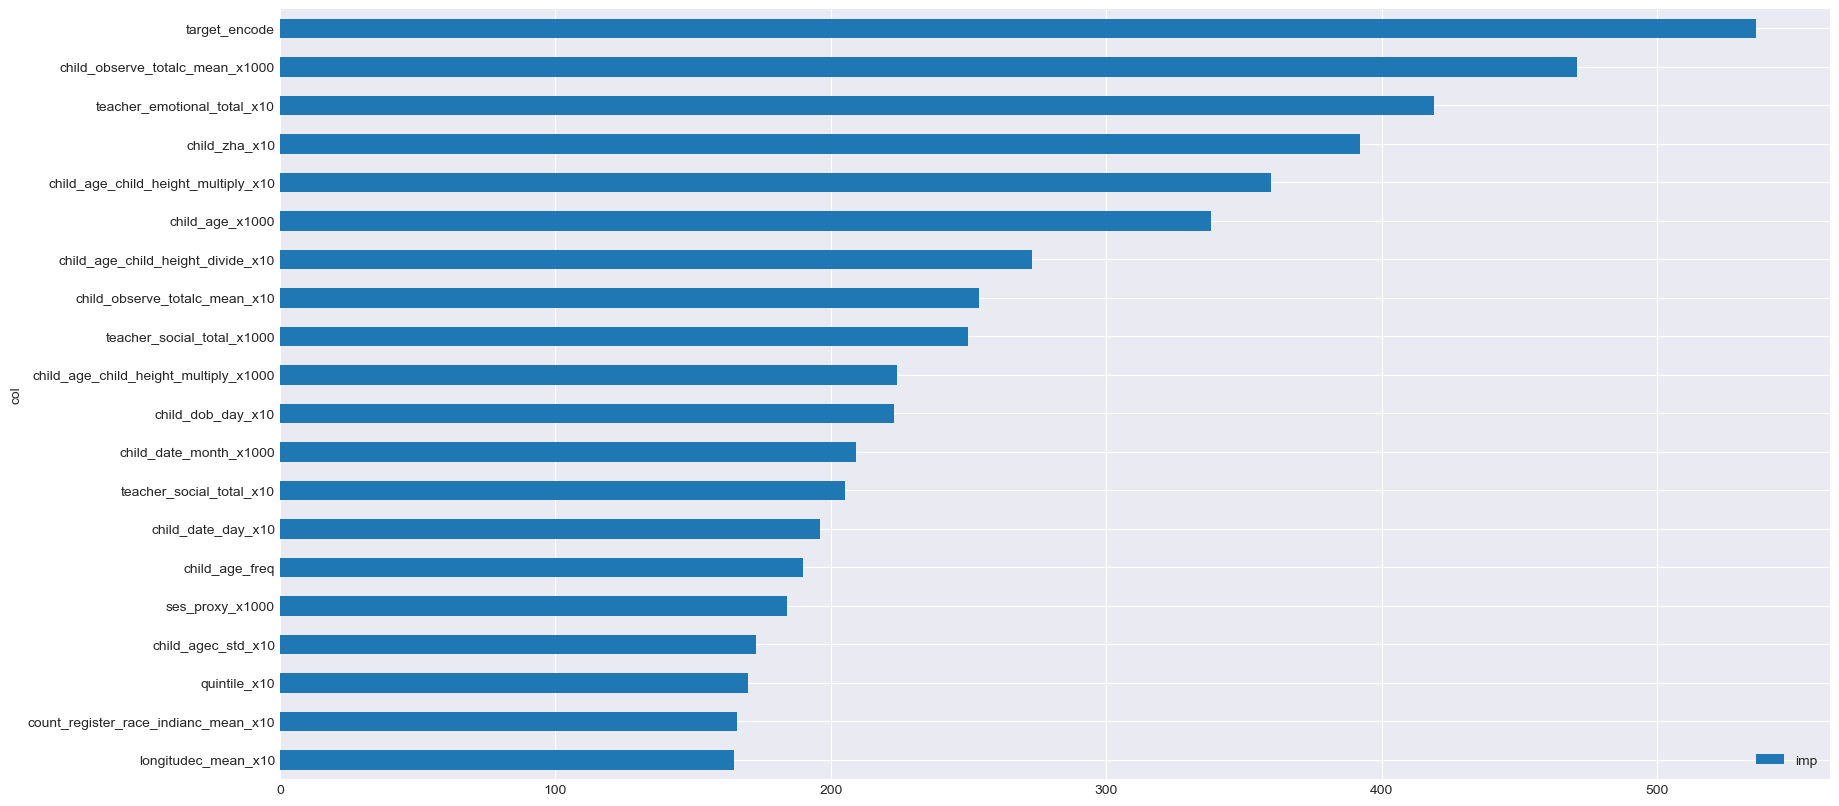

In [199]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [222]:
feature_importances = model.feature_importances_
feature_names = tes.columns.tolist()
row_importances = []
for row in range(len(tes)):
    row_importance = [(feature_names[i], feature_importances[i]) for i in range(len(feature_names)) if tes.iloc[row, i] != 0]
    row_importance_sorted = sorted(row_importance, key=lambda x: x[1], reverse=True)[:15]
    row_importances.append(row_importance_sorted)

In [223]:
# Create a new dataframe with the top 15 feature importances for each row
columns = ["target"] + [f"feature_{i+1}" for i in range(15)]
data = []
for i in range(len(tes)):
    row_data = [preds[i]] + [row_importances[i][j][0] for j in range(len(row_importances[i]))]
    data.append(row_data)
df1 = pd.DataFrame(data, columns=columns)
df1['child_id'] = test.child_id

In [224]:
df1 = df1[['child_id', 'target', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']]

In [225]:
df1.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,59.586445,target_encode,child_observe_totalc_mean_x1000,teacher_emotional_total_x10,child_age_child_height_multiply_x10,child_zha_x10,child_age_x1000,child_observe_totalc_mean_x10,teacher_social_total_x1000,child_age_child_height_divide_x10,child_age_child_height_multiply_x1000,child_dob_day_x10,child_date_month_x1000,child_age_freq,child_date_day_x10,child_agec_std_x10
1,ID_GQ6ONJ4FP,46.116900,target_encode,child_observe_totalc_mean_x1000,teacher_emotional_total_x10,child_age_child_height_multiply_x10,child_zha_x10,child_age_x1000,child_observe_totalc_mean_x10,teacher_social_total_x1000,child_age_child_height_divide_x10,child_age_child_height_multiply_x1000,child_dob_day_x10,child_date_month_x1000,child_age_freq,child_date_day_x10,child_agec_std_x10
2,ID_YZ76CVRW3,47.756915,target_encode,child_observe_totalc_mean_x1000,teacher_emotional_total_x10,child_age_child_height_multiply_x10,child_zha_x10,child_age_x1000,child_observe_totalc_mean_x10,child_age_child_height_divide_x10,child_age_child_height_multiply_x1000,child_dob_day_x10,child_date_month_x1000,child_age_freq,child_date_day_x10,child_agec_std_x10,ses_proxy_x1000
3,ID_BNINCRXH8,71.202325,target_encode,child_observe_totalc_mean_x1000,teacher_emotional_total_x10,child_age_child_height_multiply_x10,child_zha_x10,child_age_x1000,child_observe_totalc_mean_x10,teacher_social_total_x1000,child_age_child_height_divide_x10,child_age_child_height_multiply_x1000,child_dob_day_x10,child_date_month_x1000,child_age_freq,child_date_day_x10,child_agec_std_x10
4,ID_1U7GDTLRI,44.471791,target_encode,child_observe_totalc_mean_x1000,teacher_emotional_total_x10,child_age_child_height_multiply_x10,child_zha_x10,child_age_x1000,child_observe_totalc_mean_x10,teacher_social_total_x1000,child_age_child_height_divide_x10,child_age_child_height_multiply_x1000,child_dob_day_x10,child_date_month_x1000,child_age_freq,child_date_day_x10,child_agec_std_x10


In [226]:
df1.to_csv('sub.csv', index = False)